In [3]:
import pandas as pd
import numpy as np
import random

Define parameters: 
1. Agent can make 4 actions: up, down, left and right. 
2. high/lenght - cliff size
3. Start/Goal -  
4. q_values - 3d matrix - represent the value for each action 

In [4]:
UP = 0
DOWN = 1
RIGHT = 2
LEFT = 3
ACTION = [UP, DOWN, RIGHT, LEFT]
high = 4
length = 12
START = [high-1, 0]
GOAL = [high-1, length-1]

q_values = np.zeros((high,length, len(ACTION)))

In [5]:
q_values

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
      

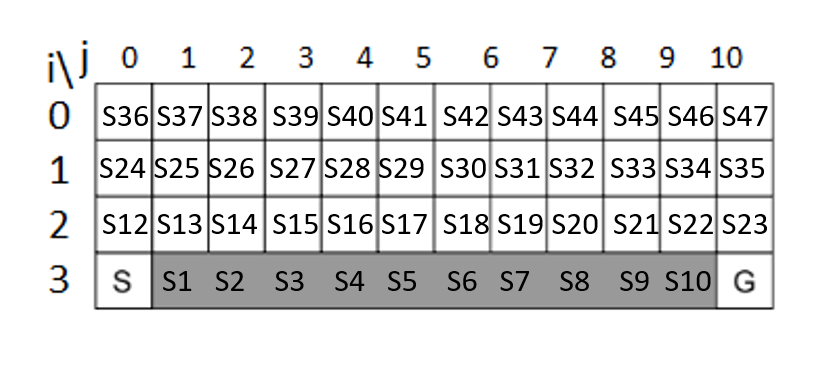

In [6]:
q_values[0] # state s36 - s47 and 4 action 

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
q_values[1] # state s24 - s35 and 4 action 

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [8]:
q_values[2] # state s12 - s23 and 4 action 

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
q_values[3] # state s0 - s11 and 4 action 

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
def policy(state, epsilon):
    """
    Choose action for given state. 
    :param state: current state 
    :param epsilon: the probability of random decisions
    :return: action 
    """
    if random.random() < epsilon:  # random.random()  => [0.0, 1.0)
        return np.random.choice(ACTION) # random action 
    else:
        return np.argmax(q_values[state[0]][state[1]]) # action with max q_values 

In [11]:
def reset_game():
    """
    Return coordinates of start position. 
    """
    return START

In [12]:
def step(state, action):
    """
    Choose next state for given action and state. 
    :param state: current state 
    :param action: current action 
    :return: reward, next_state, done
    """
   
    i, j = state
     # Possible action and next state 
    if action == UP:
        next_state = [max(i-1, 0),j]                          
    elif action == DOWN:
        next_state = [min(i+1, high-1), j]                           
    elif action == LEFT:
        next_state = [i, max(j-1, 0)] 
    elif action == RIGHT:
        next_state = [i, min(j+1, length-1)] 
                                        
    # Rules
    if (action == DOWN and i == (high-2) and j>0 and j<(length-1))  or (action == RIGHT and i == (high-1) and j == 0):
        reward = -100 
        done = True
    elif(action == DOWN and i == (high-2) and j == (length-1)):
        reward = 0
        done = True
    else:
        reward = -1
        done = False

    return next_state, reward, done

In [13]:
def q_learning(num_episodes=500, epsilon=-1, learning_rate=0.1, gamma=0.9):
    """
    Q_learing 
    First choose action from policy. 
    Get next state, reward and if the game is over. 
    Add reward to  reward_sum which is a sum reward for each episod. 
    Update q_values matrix. 
    """
    rewards=[]
    for _ in range(num_episodes):
        state = reset_game()
        done = False
        reward_sum = 0
       
        while not done:
            action = policy(state, epsilon) 
            next_state, reward, done = step(state, action) 
            reward_sum+= reward 
            # Q(S,A)<- Q(S,A) + alpha*(reward+gamma*maxQ(S_next, A_next)-Q(S,A))
            q_values[state[0]][state[1]][action]+=learning_rate*(reward + gamma*(max(q_values[next_state[0]][next_state[1]])-q_values[state[0]][state[1]][action]))

            state=next_state
        rewards.append(reward_sum)

    return  rewards

In [14]:
def find_action_with_max_q(i,j):
    """
    Find action from current position with max q_values 
    """
    return np.argmax(q_values[i][j])

In [15]:
def print_action(action):
    """
    Print action 
    """
    if action == 0: print("UP")
    elif action == 1: print("DOWN")
    elif action == 2: print("RIGHT")
    elif action == 3: print("LEFT")

In [16]:
def change_position_after_action(state, action):
    """
    Return next state after action 
    """
    i,j = state
    if action == UP:
        next_state = [max(i-1, 0),j]
    elif action == DOWN:
        next_state = [min(i+1, high-1), j] # high = 4 
    elif action == LEFT:
        next_state = [i, max(j-1, 0)]
    elif action == RIGHT:
        next_state = [i, min(j+1, length-1)] # len = 12 
    return next_state

In [17]:
def show_optimal_acion():
    """
    Show optimal action from START to GOAL 
    """
    action = find_action_with_max_q(START[0], START[1])
    next_state =change_position_after_action(START, action)
    while next_state != GOAL:
        print_action(action)
        action = find_action_with_max_q(next_state[0], next_state[1])
        next_state =change_position_after_action(next_state, action)
        if next_state == GOAL:
            print_action(action)
            

In [18]:
rewards =  q_learning()

In [19]:
show_optimal_acion()

UP
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
DOWN


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
const = [-12 for i in range(0,len(rewards))]

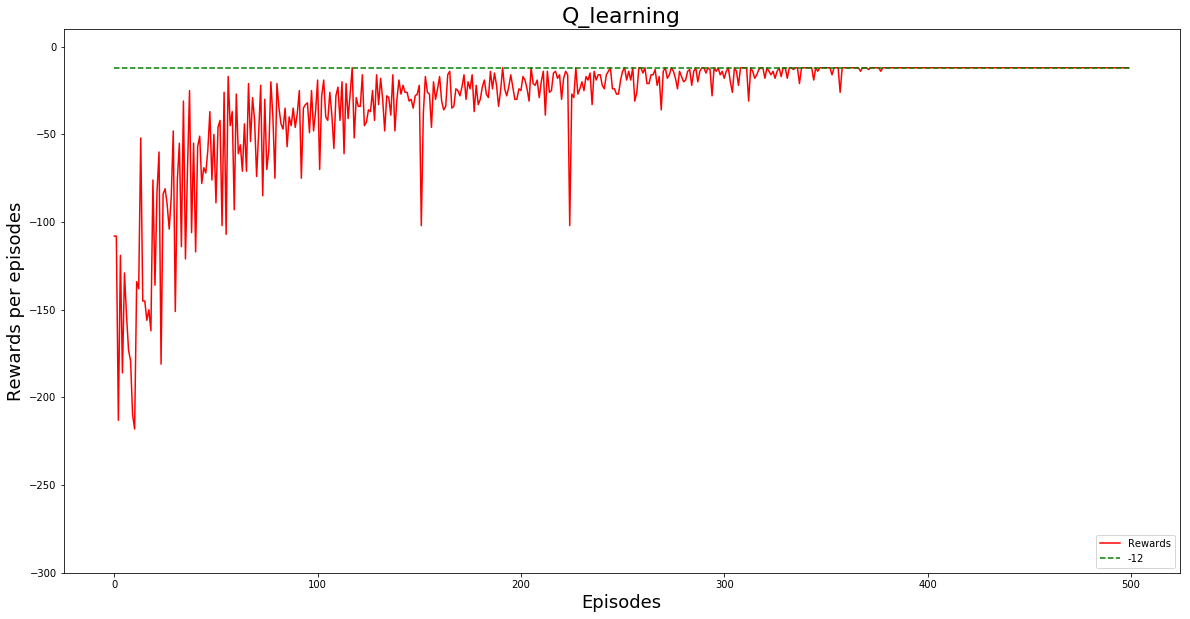

In [22]:
plt.figure(figsize=(20,10))
plt.plot(rewards, color='red')
plt.plot(const, color='green', linestyle='--')
plt.title("Q_learning",  fontsize=22)
plt.ylim(-300,10)
plt.xlabel("Episodes",  fontsize=18)
plt.ylabel("Rewards per episodes",  fontsize=18)
plt.legend(["Rewards","-12" ], loc="lower right")
plt.show()